# SI618 Lab 8

### Total score is 100 points

  **Make sure you show your code and explain your answers for each question**

## Overview

This lab consists of an exploration of a well-known UCI data set about wine quality.  The dataset comes from https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

## Wine Dataset

We get you started by loading some libraries as well as the wine quality dataset:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Q1. [5 points] What is the median of 'quality'?


In [3]:
quality = wine['quality']
np.median(quality)

6.0

### Q2. [20 points] What is the mean, median and 95% percentile range [2.5%, 97.5%] of all variables except quality? Please use a markdown cell

In [4]:
col = wine.columns.values.tolist()
col.remove('quality')
df = wine[col].copy()
mean = df.mean()
median = df.median()
percentile = df.quantile([0.025, 0.975])
stats = percentile.append(mean, ignore_index=True)
stats = stats.append(median, ignore_index=True)
stats.index = ['2.5%', '97.5%', 'mean', 'median']
stats

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2.5%,5.600000,0.240000,0.000000,1.400000,0.048000,3.000000,10.000000,0.992939,3.019500,0.440000,9.100000
97.5%,12.500000,0.915000,0.660000,6.300000,0.205000,40.525000,131.000000,1.000400,3.610500,1.080000,12.800000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
median,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000


The mean, median and 95% percentile range [2.5%, 97.5%] of all variables except quality are as follow,

| | fixed acidity	|volatile acidity|	citric acid|	residual sugar|	chlorides	|free sulfur dioxide|	total sulfur dioxide	|density	|pH	|sulphates	|alcohol|
|  ----  | ----  |----  | ----  |----  | ----  |----  | ----  |----  | ----  |----  | ----  |
|mean	|8.319637	|0.527821	|0.270976|	2.538806	|0.087467	|15.874922	|46.467792	|0.996747|	3.311113	|0.658149	|10.422983|
|median	|7.900000	|0.520000	|0.260000	|2.200000	|0.079000	|14.000000	|38.000000|	0.996750|	3.310000	|0.620000	|10.200000|
|2.5%|	5.600000|	0.240000|	0.000000|	1.400000|	0.048000|	3.000000|	10.000000|	0.992939|	3.019500|	0.440000|	9.100000|
|97.5%	|12.500000	|0.915000|	0.660000	|6.300000	|0.205000|	40.525000|	131.000000|	1.000400|	3.610500|	1.080000|	12.800000|

### Q3a. [5 points] Create a column based on quality called 'good_wine'. If the quality is greater or equal to the median, it returns 'yes', otherwise it returns 'no' (Hint: you can use the pd.cut function we learnt earlier. Try to avoid using for loops)

In [5]:
quality_median = np.median(quality)
wine['good_wine'] = pd.cut(wine['quality']>=quality_median, 2, labels=['no','yes'])
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_wine
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,no
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,no
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,no
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,yes
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,no
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,yes
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,yes
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,no


### Q3b. [10 points] Create a column based on residual sugar called 'sweetness'. Assign the labels "low" to the first quartile, "moderate" to the second and third quartiles, and "high" to the fourth. (Hint: Consider using the pd.qcut function)

In [6]:
wine['sweetness'] = pd.qcut(wine['residual sugar'], [0,0.25,0.75,1], labels=['low', 'moderate', 'high'])
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_wine,sweetness
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,no,low
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,no,moderate
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,no,moderate
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,yes,low
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,no,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,no,moderate
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,yes,moderate
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,yes,moderate
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,no,moderate


### Q4. [20 points] Create violin plot  that shows the ph levels (y-axis) for wines with different quality (x-axis), separated according to this new "sweetness" column.  What can you say about the interaction of acidity (i.e. pH. lower pH means more acidic) and sweetness as the quality of the wine varies? (You can adjust figure size if details aren't clear).

<AxesSubplot:xlabel='quality', ylabel='pH'>

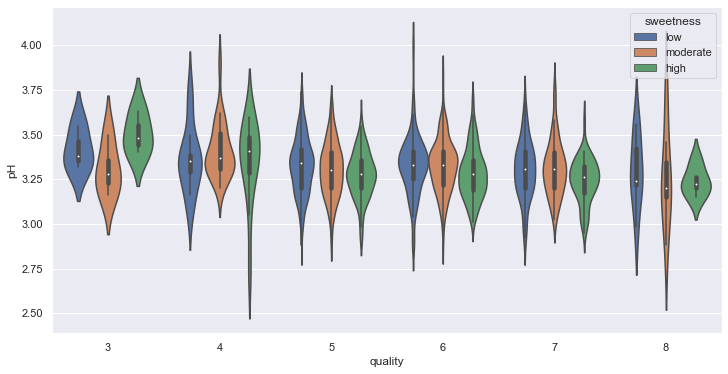

In [7]:
sns.set(rc={"figure.figsize": (12, 6)})
sns.violinplot(x='quality', y='pH', hue='sweetness', data=wine)

As the quality of the wine grows, the pH of the lower sweetness wines becomes more dispersed, while the pH distribution of the higher sweetness wines is more concentrated.

### Q4. [15 points] Make a pairplot that uses color to differentiate good and bad wine using the good_wine for the following:
- fixed acidity
- volatile acidity
- citric acid 
- residual sugar
- free sulfur dioxide 
- pH 
- alcohol

### Answer the following two questions:
1. Which variable distribution is most different across good and bad wines?
2. List at least one pair of positively correlated and one pair of negatively correlated variables

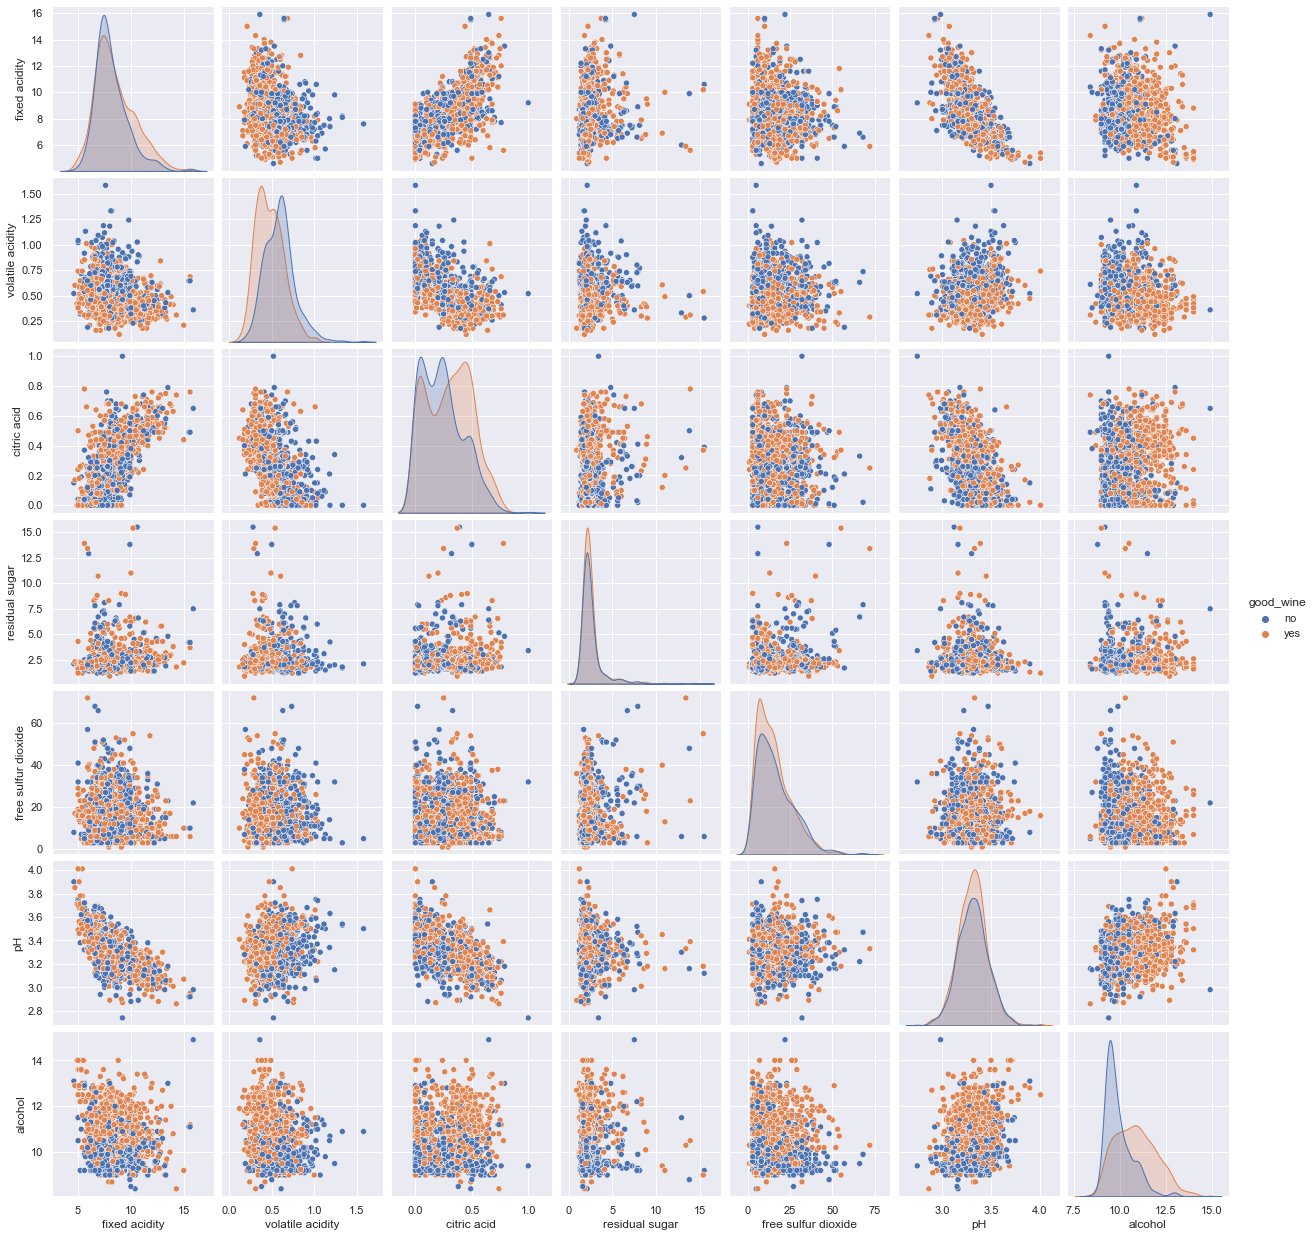

In [8]:
df = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'pH', 'alcohol', 'good_wine']]
sns.pairplot(df,hue="good_wine")

1. The distribution of Alcohol is most different across good and bad wines. Bad-quality wines have lower alcohol content and are more concentrated, while good-quality wines have lower alcohol content and are more distributed.

2. Fixed acidity and citric acid are positively correlated. Volatile acidity andcitric acid are negatively correlated.

### Q5. [10 points] Create a mosaic plot to observe the relationship between **sweetness** and **good_wine**. Does it seem like good wines more likely to be associated with a characteristic level of sweetness? 

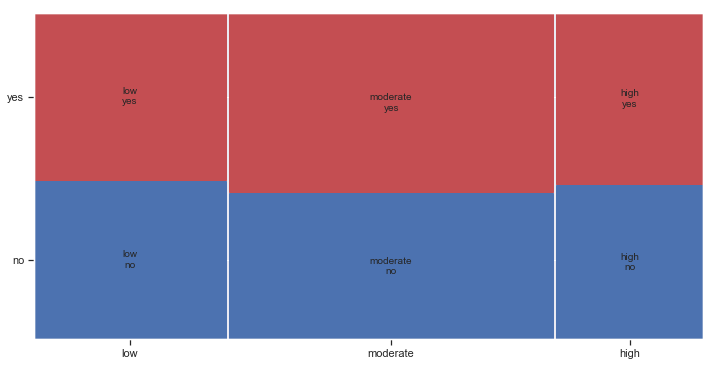

In [9]:
from statsmodels.graphics.mosaicplot import mosaic
props = lambda key: {'color': 'r' if 'yes' in key else 'b'}
t = mosaic(wine, ['sweetness','good_wine'], properties=props)

It seems that there is no obvious association between the likelihood of good wines and the level of sweetness.

### Q6. [10 points] Starting with a cross tabulation of the actual data, create a table that shows the number of wines by quality (good or not) that would be associated with different levels of sweetness if sweetness was not related to quality

In [10]:
ct = pd.crosstab(wine.good_wine,wine.sweetness)
ct

sweetness,low,moderate,high
good_wine,,,
no,226,350,168
yes,238,430,187


In [11]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct)
ex = pd.DataFrame(ex)
ex.index = ['no', 'yes']
ex.columns = ['low', 'moderate', 'high']
ex

,low,moderate,high
no,215.894934,362.926829,165.178236
yes,248.105066,417.073171,189.821764


### Q7. [5 points] Is the relationship you observe between sweetness and quality based on Q5 and Q6 statistically significant? ($\alpha = 0.05$) 

In [12]:
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)

chi2 =  1.8357800035942151
p-val =  0.3993608032910923
degree of freedom =  2


We cannot reject the null hypothesis that sweetness and quality are indepedent of each other.

# <font color='red'>Submission Details:</font>
## <font color='red'> Please submit both si618_lab8_uniqname.ipynb and si618_lab8_uniqname.html SEPARATELY on canvas</font>